## Crime Data Analysis (2020-Present)

# Project Overview
- Data loading and inspection
- Data cleaning and preprocessing
- Exploratory Data Analysis (EDA)
- Data visualisation
- Machine learning (classification)
- Insights, limitations, and conclusions

In [1]:
## Importing Libraries
# pnadas & numpy for data manipulation
# matplotlib & seaborn for visualisation
# scikit-learn for machine learning

import pandas as pd
import numpy as up
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Imporovce plot readability 
plt.rcParams["figure.figsize"] = (10, 6)

## Load the Dataset

In [2]:
df = pd.read_csv("Crime_Data_From_2020_to_Present.csv")

# Display the first few rows
print(df.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  211507896  04/11/2021 12:00:00 AM  11/07/2020 12:00:00 AM       845    15   
1  201516622  10/21/2020 12:00:00 AM  10/18/2020 12:00:00 AM      1845    15   
2  240913563  12/10/2024 12:00:00 AM  10/30/2020 12:00:00 AM      1240     9   
3  210704711  12/24/2020 12:00:00 AM  12/24/2020 12:00:00 AM      1310     7   
4  201418201  10/03/2020 12:00:00 AM  09/29/2020 12:00:00 AM      1830    14   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0  N Hollywood         1502         2     354   
1  N Hollywood         1521         1     230   
2     Van Nuys          933         2     354   
3     Wilshire          782         1     331   
4      Pacific         1454         1     420   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                                  THEFT OF IDENTITY  ...     IC  Invest Cont   
1     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     

## Data Inspection

In [3]:
# Data shape (rows, columns)
print("Dataset shape:", df.shape)

# Data types and non-null counts
print(df.info())

# Summary statistics for numeral columns
print(df.describe())

Dataset shape: (1004991, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon 

## Data Cleaning and Preprocessing

In [4]:
# Handle missing values
# Calculate percentage of missing values per column
missing_percentage = df.isna().mean().sort_values(ascending=False)
print(missing_percentage.head(10))

# Drop columns with excessive missing values (threshhold: 60%)
df = df.loc[:, df.isna().mean() < 0.6]

# Drop rows with remaning missing values for simplicity
#(In a real-world project, imputation may be considered)
df = df.dropna()

print("Shape after handling missing values:", df.shape)

Crm Cd 4          0.999936
Crm Cd 3          0.997697
Crm Cd 2          0.931183
Cross Street      0.846530
Weapon Used Cd    0.674378
Weapon Desc       0.674378
Mocodes           0.150866
Vict Descent      0.143938
Vict Sex          0.143926
Premis Desc       0.000585
dtype: float64
Shape after handling missing values: (852560, 22)


In [5]:
# Convert date columns to datetime in present
if"DATE OCC" in df.columns:
    df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")

# Extract useful time-based features
if "DATE OCC" in df.columns:
    df["Year"] = df["DATE OCC"].dt.year
    df["Month"] = df["DATE OCC"].dt.month
    df["DayOfWeek"] = df["DATE OCC"].dt.day_name()

/var/folders/m1/9s4r7xtx2tg0xzv7qj1gbnrw0000gn/T/ipykernel_39865/2663929218.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")


In [6]:
# Remove duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


## Exploratory Data Analysis (EDA)

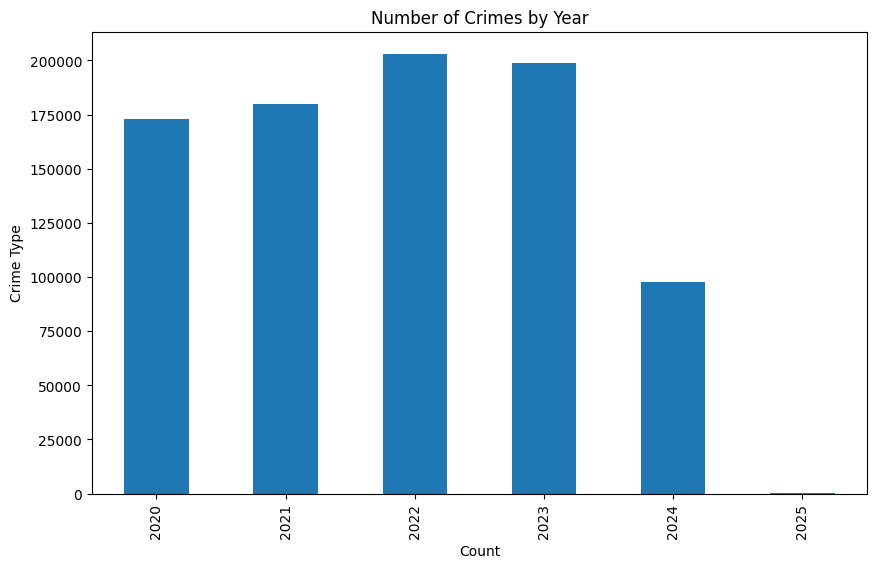

In [7]:
# Univariate analysis - crime count by year
if "Year" in df.columns:
    df["Year"].value_counts().sort_index().plot(kind="bar")
    plt.title("Number of Crimes by Year")
    plt.xlabel("Count")
    plt.ylabel("Crime Type")
    plt.show() 

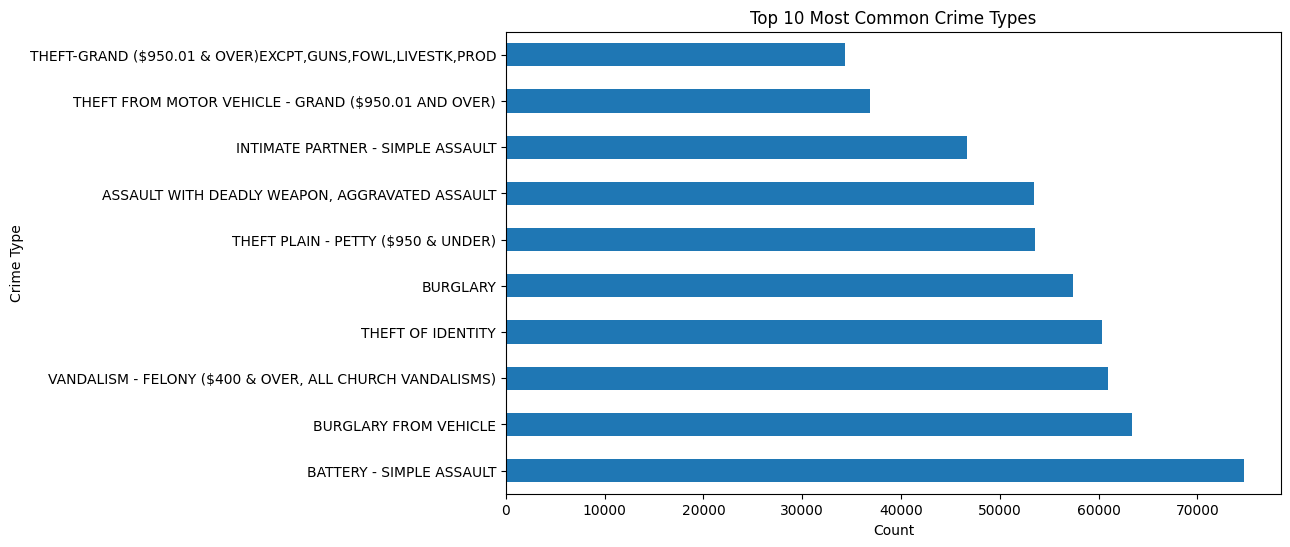

In [8]:
# Crime distribution by type
if "Crm Cd Desc" in df.columns:
    top_crimes = df["Crm Cd Desc"].value_counts().head(10)
    top_crimes.plot(kind="barh")
    plt.title("Top 10 Most Common Crime Types")
    plt.xlabel("Count")
    plt.ylabel("Crime Type")
    plt.show()

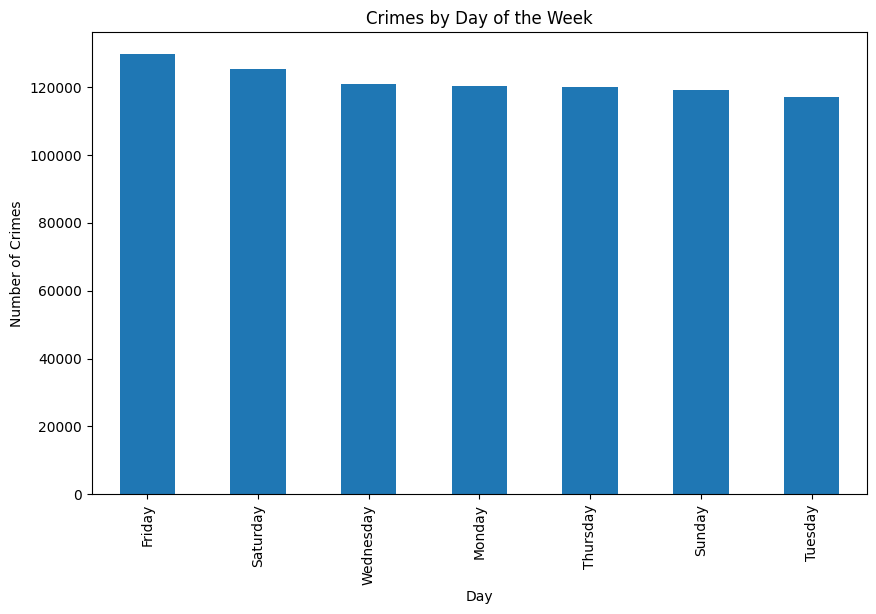

In [9]:
# Crime by day of the week
if "DayOfWeek" in df.columns:
    df["DayOfWeek"].value_counts().plot(kind="bar")
    plt.title("Crimes by Day of the Week")
    plt.xlabel("Day")
    plt.ylabel("Number of Crimes")
    plt.show()

## Key Insights from EDA
- Certain crime categories dominate overall crime volume
- Crime frequency varies by year and day of the week
- Temporal patterns suggest potential seasonality

## Machine Learning Problem Definition

Problem: Predict the type of crime based on time-related features

Target variable: Crime Description

Features: Year, Month, Day of Week

# This is a multiclass classification problem suitable for:
- Logistic Regression
- Decision Trees
- Random Forest (chosen in this project for robustness and interpretability

In [10]:
# Prepare Data for Machine Learning
# Select relevant columns
features = ["Year", "Month", "DayOfWeek"]
target = "Crm Cd Desc"

# Encode categorical features
le_day = LabelEncoder()
df["DayOfWeek_encoded"] = le_day.fit_transform(df["DayOfWeek"])

le_target = LabelEncoder()
df["target_encoded"] = le_target.fit_transform(df[target])

X = df[["Year", "Month", "DayOfWeek_encoded"]]
y = df["target_encoded"]

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train machine learning model
model = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               n_jobs=1
                              )

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [12]:
# Model evaluation
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       454
           1       0.00      0.00      0.00       231
           2       0.08      0.01      0.02     10504
           3       0.00      0.00      0.00       957
           4       0.10      0.67      0.17     15051
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00       533
           7       0.00      0.00      0.00       832
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00      1706
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        82
          14       0.00      0.00      0.00      2900
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        60
          17       0.00      0.00      0.00      1290
    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

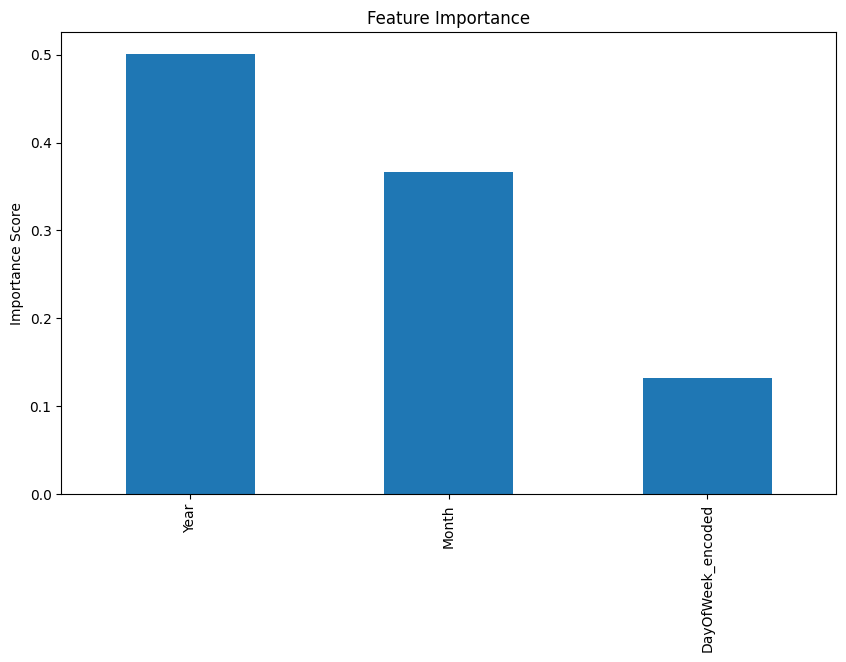

In [13]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importance.plot(kind="bar")
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

## Model Limitations
- Only time-based features are used
- No spatial or socio-economic data included
- Class imbalance may affect performance
- Predictions should not be used for real-world decision making

## Conclusion

This project demonstrates:

- Practical data cleaning and preprocessing
- Clear exploratory data analysis
- Effective visualisation of trends
- A complete machine learning pipeline

The focus is on clarity, reproducibility, and explainability.

## Future Work

- Include location-based features
- Address class imbalance
- Try more advance models
- Add external datasets (weather, population)